In [8]:
!python3 ppo_train_baseline.py -en SawyerDoor-v0 -r 0 -g 1 -n 50

/home/hsun/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
^C


# Load Logs

In [20]:
import numpy as np

In [21]:
data[0]

'pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)\nHello from the pygame community. https://www.pygame.org/contribute.html\nevaluation result: (7.98, 5.266158152935526, 0.78, 0.15960000000000002)\nFinished episode: 0 Reward: 1.8000 Return 1.8000 Stay Rate0.0360 SuccessRate0.6000\n'

In [11]:
import os
fl = os.listdir('logs')

In [12]:
fl

['fetchreach5.txt',
 'sawyer1.txt',
 'point2d3.txt',
 'sawyer2.txt',
 'reacher5.txt',
 'pointlarge3.txt',
 'sawyerxyz4.txt',
 'pointlarge2.txt',
 'sawyer5.txt',
 'reacher4.txt',
 'pointlarge1.txt',
 'reacher1.txt',
 'point2d2.txt',
 'reacher3.txt',
 'fetchreach2.txt',
 'reacher2.txt',
 'point2d5.txt',
 'pointlarge4.txt',
 'sawyer3.txt',
 'fetchreach3.txt',
 'point2d1.txt',
 'sawyer4.txt',
 'fetchreach1.txt',
 'sawyerxyz5.txt',
 'sawyerxyz3.txt',
 'pointlarge5.txt',
 'sawyerxyz2.txt',
 'point2d4.txt',
 'sawyerxyz1.txt',
 'fetchreach4.txt']

In [22]:
data[episode].split('result: (')[1].split(')')[0].split(',')

['32.04', ' 20.186766852579495', ' 1.0', ' 0.6408']

In [18]:
fl

['fetchreach5.txt',
 'sawyer1.txt',
 'point2d3.txt',
 'sawyer2.txt',
 'reacher5.txt',
 'pointlarge3.txt',
 'sawyerxyz4.txt',
 'pointlarge2.txt',
 'sawyer5.txt',
 'reacher4.txt',
 'pointlarge1.txt',
 'reacher1.txt',
 'point2d2.txt',
 'reacher3.txt',
 'fetchreach2.txt',
 'reacher2.txt',
 'point2d5.txt',
 'pointlarge4.txt',
 'sawyer3.txt',
 'fetchreach3.txt',
 'point2d1.txt',
 'sawyer4.txt',
 'fetchreach1.txt',
 'sawyerxyz5.txt',
 'sawyerxyz3.txt',
 'pointlarge5.txt',
 'sawyerxyz2.txt',
 'point2d4.txt',
 'sawyerxyz1.txt',
 'fetchreach4.txt']

In [49]:
data[episode].split('warnings')[1].split('))\n')[1].split('\nFinished')[0].split('(')[1].split(')')[0].split(',')[0]

['evaluation result: (0.0, 0.0, 0.0, 0.0)',
 ' episode: 5 Reward: 2.4000 Return 2.4000 Stay Rate0.0480 SuccessRate0.2000\n']

In [118]:
result = {}
for file_name in fl:
    print(file_name)
    with open(f"logs/{file_name}", "r") as f:
        data = f.read().split('-----------------')
    result[file_name] = []
    for episode in range(len(data)-1):
        if not 'warning' in data[episode] or 'result: (' in data[episode]:
            ep = int(data[episode].split('episode:')[1].split('Reward:')[0])
            rew = float(data[episode].split('episode:')[1].split('Reward:')[1].split('Stay Rate')[0].split('Return')[0])
            ret = float(data[episode].split('episode:')[1].split('Reward:')[1].split('Stay Rate')[0].split('Return')[1])
            st_r = float(data[episode].split('Return')[1].split('Stay Rate')[1].split('SuccessRate')[0])
            su_r = float(data[episode].split('Return')[1].split('Stay Rate')[1].split('SuccessRate')[1].split('\n')[0].split('/home')[0])

            eval_rew = float(data[episode].split('result: (')[1].split(')')[0].split(',')[0])
            eval_ret = float(data[episode].split('result: (')[1].split(')')[0].split(',')[1])
            eval_stay = float(data[episode].split('result: (')[1].split(')')[0].split(',')[2])
            eval_succ = float(data[episode].split('result: (')[1].split(')')[0].split(',')[3])
        else:
            ep = int(data[episode].split('episode:')[1].split('Reward:')[0])
            rew = float(data[episode].split('episode:')[1].split('Reward:')[1].split('Stay Rate')[0].split('Return')[0])
            ret = float(data[episode].split('episode:')[1].split('Reward:')[1].split('Stay Rate')[0].split('Return')[1])
            st_r = float(data[episode].split('Return')[1].split('Stay Rate')[1].split('SuccessRate')[0])
            su_r = float(data[episode].split('Return')[1].split('Stay Rate')[1].split('SuccessRate')[1].split('\n')[0].split('/home')[0])
            eval_rew = float(data[episode].split('warnings')[1].split('))\n')[1].split('\nFinished')[0].split('(')[1].split(')')[0].split(',')[0])
            eval_ret = float(data[episode].split('warnings')[1].split('))\n')[1].split('\nFinished')[0].split('(')[1].split(')')[0].split(',')[1])
            eval_stay = float(data[episode].split('warnings')[1].split('))\n')[1].split('\nFinished')[0].split('(')[1].split(')')[0].split(',')[2])
            eval_succ = float(data[episode].split('warnings')[1].split('))\n')[1].split('\nFinished')[0].split('(')[1].split(')')[0].split(',')[3])
        
#         print('episode:',ep)
#         print('reward',rew)
#         print('stay rate',st_r)
#         print('success rate',su_r)
        result[file_name].append((ep, rew, ret, st_r, su_r, eval_rew, eval_ret, eval_stay, eval_succ))

fetchreach5.txt
sawyer1.txt
point2d3.txt
sawyer2.txt
reacher5.txt
pointlarge3.txt
sawyerxyz4.txt
pointlarge2.txt
sawyer5.txt
reacher4.txt
pointlarge1.txt
reacher1.txt
point2d2.txt
reacher3.txt
fetchreach2.txt
reacher2.txt
point2d5.txt
pointlarge4.txt
sawyer3.txt
fetchreach3.txt
point2d1.txt
sawyer4.txt
fetchreach1.txt
sawyerxyz5.txt
sawyerxyz3.txt
pointlarge5.txt
sawyerxyz2.txt
point2d4.txt
sawyerxyz1.txt
fetchreach4.txt


In [119]:
for i in range(5):
    print(np.shape(result[f'sawyer{i+1}.txt']))

(800, 9)
(800, 9)
(800, 9)
(800, 9)
(800, 9)


In [120]:

reacher = np.stack((result['reacher1.txt'][:400],
                         result['reacher1.txt'][400:],
                         result['reacher2.txt'][:400],
                         result['reacher2.txt'][400:],
                         result['reacher3.txt'][:400],
                         result['reacher3.txt'][400:],
                         result['reacher4.txt'][:400],
                         result['reacher4.txt'][400:],
                         result['reacher5.txt'][:400],
                         result['reacher5.txt'][400:]))
fetch_reach = np.stack((result['fetchreach1.txt'][:50],
                         result['fetchreach1.txt'][50:],
                         result['fetchreach2.txt'][:50],
                         result['fetchreach2.txt'][50:],
                         result['fetchreach3.txt'][:50],
                         result['fetchreach3.txt'][50:],
                         result['fetchreach4.txt'][:50],
                         result['fetchreach4.txt'][50:],
                         result['fetchreach5.txt'][:50],
                         result['fetchreach5.txt'][50:]))
sawyerxyz = np.stack((result['sawyerxyz1.txt'][:50],
                         result['sawyerxyz1.txt'][50:],
                         result['sawyerxyz2.txt'][:50],
                         result['sawyerxyz2.txt'][50:],
                         result['sawyerxyz3.txt'][:50],
                         result['sawyerxyz3.txt'][50:],
                         result['sawyerxyz4.txt'][:50],
                         result['sawyerxyz4.txt'][50:],
                         result['sawyerxyz5.txt'][:50],
                         result['sawyerxyz5.txt'][50:]))
pointlarge = np.stack((result['pointlarge1.txt'][:50],
                         result['pointlarge1.txt'][50:],
                         result['pointlarge2.txt'][:50],
                         result['pointlarge2.txt'][50:],
                         result['pointlarge3.txt'][:50],
                         result['pointlarge3.txt'][50:],
                         result['pointlarge4.txt'][:50],
                         result['pointlarge4.txt'][50:],
                         result['pointlarge5.txt'][:50],
                         result['pointlarge5.txt'][50:]))
point2d = np.stack((result['point2d1.txt'][:50],
                         result['point2d1.txt'][50:],
                         result['point2d2.txt'][:50],
                         result['point2d2.txt'][50:],
                         result['point2d3.txt'][:50],
                         result['point2d3.txt'][50:],
                         result['point2d4.txt'][:50],
                         result['point2d4.txt'][50:],
                         result['point2d5.txt'][:50],
                         result['point2d5.txt'][50:]))
sawyer = np.stack((result['sawyer1.txt'][:400],
                         result['sawyer1.txt'][400:],
                         result['sawyer2.txt'][:400],
                         result['sawyer2.txt'][400:],
                         result['sawyer3.txt'][:400],
                         result['sawyer3.txt'][400:],
                         result['sawyer4.txt'][:400],
                         result['sawyer4.txt'][400:],
                         result['sawyer5.txt'][:400],
                         result['sawyer5.txt'][400:]))

In [121]:
fetch_reach.shape

(10, 50, 9)

In [130]:
results = {}
results['reacher'] = reacher
results['fetch_reach'] = fetch_reach
results['sawyerxyz'] = sawyerxyz
results['pointlarge'] = pointlarge
results['point2d'] = point2d
results['sawyer'] = sawyer
np.save('results.npy',results)

In [132]:
rrrr = np.load('results.npy',allow_pickle=True)

In [133]:
rrrr

array({'reacher': array([[[0.00000000e+00, 3.80000000e+00, 3.80000000e+00, ...,
         1.46360632e+00, 7.20000000e-01, 4.68000000e-02],
        [1.00000000e+00, 4.20000000e+00, 4.20000000e+00, ...,
         6.05701898e+00, 8.60000000e-01, 1.89600000e-01],
        [2.00000000e+00, 3.40000000e+00, 3.40000000e+00, ...,
         1.49044158e+00, 5.00000000e-01, 4.84000000e-02],
        ...,
        [3.97000000e+02, 6.00000000e+00, 6.00000000e+00, ...,
         1.06876450e+00, 6.60000000e-01, 3.32000000e-02],
        [3.98000000e+02, 5.80000000e+00, 5.80000000e+00, ...,
         1.60114649e+01, 1.00000000e+00, 5.13600000e-01],
        [3.99000000e+02, 8.00000000e-01, 8.00000000e-01, ...,
         8.65165841e-01, 5.00000000e-01, 2.76000000e-02]],

       [[0.00000000e+00, 3.40000000e+00, 3.40000000e+00, ...,
         1.21080972e+00, 6.00000000e-01, 3.44000000e-02],
        [1.00000000e+00, 5.40000000e+00, 5.40000000e+00, ...,
         1.61755873e+00, 6.80000000e-01, 4.96000000e-02],
       

In [122]:
np.save('reacher.npy',reacher)
np.save('fetch_reach.npy',fetch_reach)
np.save('sawyerxyz.npy',sawyerxyz)
np.save('pointlarge.npy',pointlarge)
np.save('point2d.npy',point2d)
np.save('sawyer.npy',sawyer)

In [123]:
fetch_reach = np.load('fetch_reach.npy')
print(fetch_reach.shape)

(10, 50, 9)


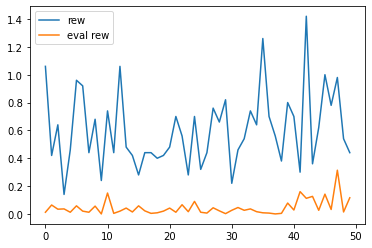

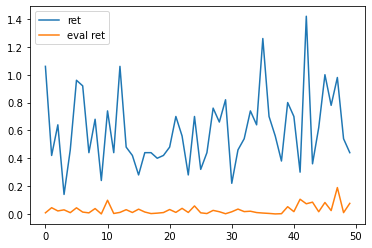

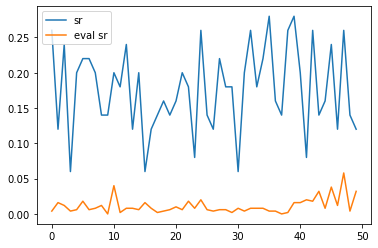

In [125]:
#(ep, 1rew, 2ret, 3st_r, 4su_r, 5eval_rew, 6eval_ret, 7eval_stay, 8eval_succ)
import matplotlib.pyplot as plt
'''reward, eval reward'''
plt.plot(fetch_reach[:,:,1].mean(0),label = 'rew')
plt.plot(fetch_reach[:,:,5].mean(0),label = 'eval rew')
plt.legend()
plt.show()
'''return, eval return'''
plt.plot(fetch_reach[:,:,2].mean(0),label = 'ret')
plt.plot(fetch_reach[:,:,6].mean(0),label='eval ret')
plt.legend()
plt.show()
'''sr, eval_sr'''
plt.plot(fetch_reach[:,:,4].mean(0),label = 'sr')
plt.plot(fetch_reach[:,:,7].mean(0),label = 'eval sr')
plt.legend()
plt.show()


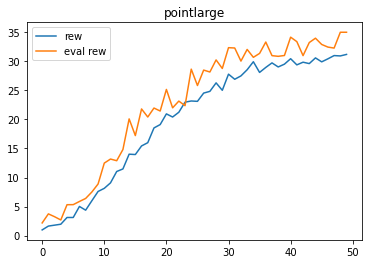

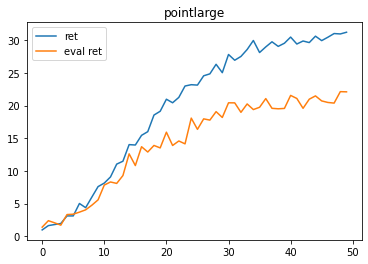

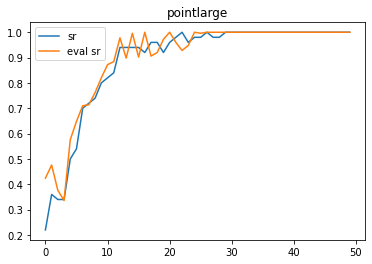

In [126]:
#(ep, 1rew, 2ret, 3st_r, 4su_r, 5eval_rew, 6eval_ret, 7eval_succ, 8eval_stay)
import matplotlib.pyplot as plt
'''reward, eval reward'''
plt.plot(pointlarge[:,:,1].mean(0),label = 'rew')
plt.plot(pointlarge[:,:,5].mean(0),label = 'eval rew')
plt.title('pointlarge')
plt.legend()
plt.show()
'''return, eval return'''
plt.plot(pointlarge[:,:,2].mean(0),label = 'ret')
plt.plot(pointlarge[:,:,6].mean(0),label='eval ret')
plt.title('pointlarge')
plt.legend()
plt.show()
'''sr, eval_sr'''
plt.plot(pointlarge[:,:,4].mean(0),label = 'sr')
plt.plot(pointlarge[:,:,7].mean(0),label = 'eval sr')
plt.title('pointlarge')
plt.legend()
plt.show()


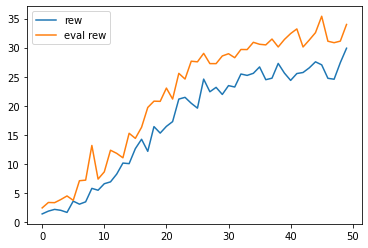

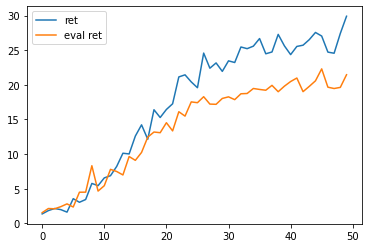

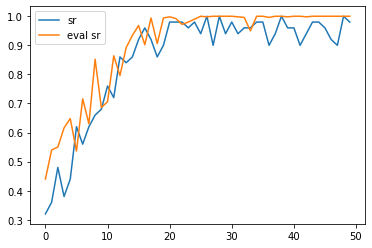

In [127]:
#(ep, 1rew, 2ret, 3st_r, 4su_r, 5eval_rew, 6eval_ret, 7eval_stay, 8eval_succ)
import matplotlib.pyplot as plt
'''reward, eval reward'''
plt.plot(point2d[:,:,1].mean(0),label = 'rew')
plt.plot(point2d[:,:,5].mean(0),label = 'eval rew')
plt.legend()
plt.show()
'''return, eval return'''
plt.plot(point2d[:,:,2].mean(0),label = 'ret')
plt.plot(point2d[:,:,6].mean(0),label='eval ret')
plt.legend()
plt.show()
'''sr, eval_sr'''
plt.plot(point2d[:,:,4].mean(0),label = 'sr')
plt.plot(point2d[:,:,7].mean(0),label = 'eval sr')
plt.legend()
plt.show()


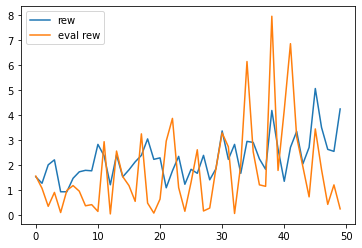

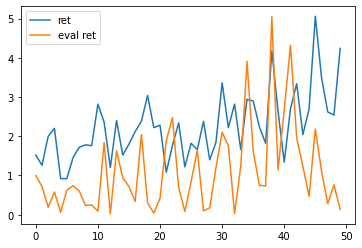

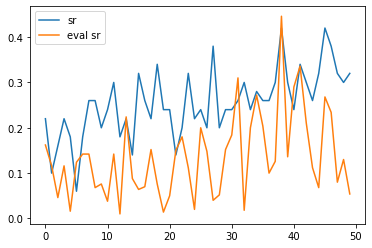

In [128]:
#(ep, 1rew, 2ret, 3st_r, 4su_r, 5eval_rew, 6eval_ret, 7eval_stay, 8eval_succ)
import matplotlib.pyplot as plt
'''reward, eval reward'''
plt.plot(sawyerxyz[:,:,1].mean(0),label = 'rew')
plt.plot(sawyerxyz[:,:,5].mean(0),label = 'eval rew')
plt.legend()
plt.show()
'''return, eval return'''
plt.plot(sawyerxyz[:,:,2].mean(0),label = 'ret')
plt.plot(sawyerxyz[:,:,6].mean(0),label='eval ret')
plt.legend()
plt.show()
'''sr, eval_sr'''
plt.plot(sawyerxyz[:,:,4].mean(0),label = 'sr')
plt.plot(sawyerxyz[:,:,7].mean(0),label = 'eval sr')
plt.legend()
plt.show()


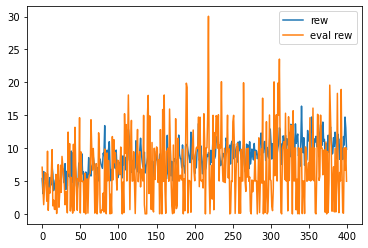

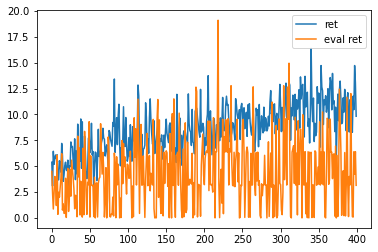

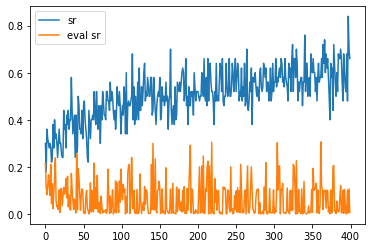

In [136]:
#(ep, 1rew, 2ret, 3st_r, 4su_r, 5eval_rew, 6eval_ret, 7eval_stay, 8eval_succ)
import matplotlib.pyplot as plt
'''reward, eval reward'''
plt.plot(sawyer[:,:,1].mean(0),label = 'rew')
plt.plot(sawyer[:,:,5].mean(0),label = 'eval rew')
plt.legend()
plt.show()
'''return, eval return'''
plt.plot(sawyer[:,:,2].mean(0),label = 'ret')
plt.plot(sawyer[:,:,6].mean(0),label='eval ret')
plt.legend()
plt.show()
'''sr, eval_sr'''
plt.plot(sawyer[:,:,4].mean(0),label = 'sr')
plt.plot(sawyer[:,:,7].mean(0),label = 'eval sr')
plt.legend()
plt.show()


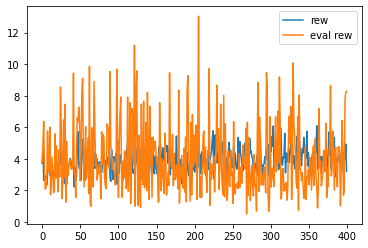

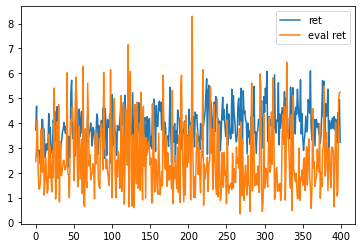

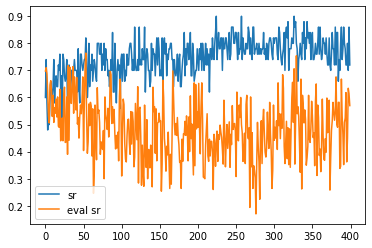

In [137]:
#(ep, 1rew, 2ret, 3st_r, 4su_r, 5eval_rew, 6eval_ret, 7eval_stay, 8eval_succ)
import matplotlib.pyplot as plt
'''reward, eval reward'''
plt.plot(reacher[:,:,1].mean(0),label = 'rew')
plt.plot(reacher[:,:,5].mean(0),label = 'eval rew')
plt.legend()
plt.show()
'''return, eval return'''
plt.plot(reacher[:,:,2].mean(0),label = 'ret')
plt.plot(reacher[:,:,6].mean(0),label='eval ret')
plt.legend()
plt.show()
'''sr, eval_sr'''
plt.plot(reacher[:,:,4].mean(0),label = 'sr')
plt.plot(reacher[:,:,7].mean(0),label = 'eval sr')
plt.legend()
plt.show()


In [138]:
!python3 ppo_train_baseline.py -en FetchReach-v1 -r 0 -g 0 -n 50 -sn True

/home/hsun/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
evaluation result: (1.22, 0.7773223474042408, 0.16, 0.024399999999999998)
Finished episode: 0 Reward: 0.4000 Return 0.2033 Stay Rate0.0080 SuccessRate0.2000
-----------------
evaluation result: (0.86, 0.5804656972327611, 0.2, 0.0172)
Finished episode: 1 Reward: 0.8000 Return 0.7307 Stay Rate0.0160 SuccessRate0.2000
-----------------
evaluation result: (0.4, 0.3007595567845061, 0.12, 0.008)
Finished episode: 2 Reward: 0.0000 Return 0.0000 Stay Rate0.0000 SuccessRate0.0000
-----------------
evaluation result: (1.06, 0.8167885695433076, 0.22, 0.0212)
Finished episode: 3 Reward: 0.0000 Return 0.0000 Stay Rate0.0000 SuccessRate0.0000
-----------------
evaluation result: (0.28, 0.21866773626902428, 0.1, 0.005600000000000001)
Finished episode: 4 Reward: 0.4000 Return 0.3882 Stay Rate0.0080 Suc